# Homework 9, Lec15
4/17/2022\
Drake Joseph

a)
Highly nonlinear oscillator: 

Recall the numerical solution for oscillations of a spring with power p = 12 (use F=-0.01\*y[0]\**11). Decompose the solution into a Fourier series and determine the number of higher harmonics that contribute at least 10%; for example, determine the n for which |bn /b1 | < 0.1. Check that resuming the components reproduces the signal.
(Landau 289)

Warning: please only sample the data within one period

Landau, Rubin H., Manuel Páez, Cristian Bordeianu. Computational Physics: Problem Solving with Python, 3rd Edition. Wiley-Blackwell, 2015-07-15. VitalBook file.


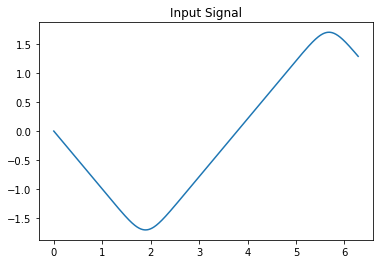

10% Signal: 0
10% Signal: 1
10% Signal: 2
10% Signal: 3
10% Signal: 4
10% Signal: 5
10% Signal: 6
10% Signal: 7
10% Signal: 8
10% Signal: 9
10% Signal: 10
10% Signal: 11
10% Signal: 12
10% Signal: 13
10% Signal: 14
10% Signal: 15
10% Signal: 16
10% Signal: 17
10% Signal: 18
10% Signal: 19
10% Signal: 20
10% Signal: 21
10% Signal: 22
10% Signal: 23
10% Signal: 24
10% Signal: 25
10% Signal: 26
10% Signal: 27
10% Signal: 28
10% Signal: 29
10% Signal: 30
10% Signal: 31
10% Signal: 32
10% Signal: 33
10% Signal: 34
10% Signal: 35
10% Signal: 36
10% Signal: 37
10% Signal: 38
10% Signal: 39
10% Signal: 40
10% Signal: 41
10% Signal: 42
10% Signal: 43
10% Signal: 44
10% Signal: 45
10% Signal: 46
10% Signal: 47
10% Signal: 48
10% Signal: 49
10% Signal: 50
10% Signal: 51
10% Signal: 52
10% Signal: 53
10% Signal: 54
10% Signal: 55
10% Signal: 56
10% Signal: 57
10% Signal: 58
10% Signal: 59
10% Signal: 60
10% Signal: 61
10% Signal: 62
10% Signal: 63
10% Signal: 64
10% Signal: 65
10% Signal: 66
10% S

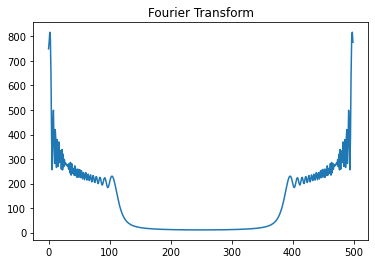

In [33]:
# a.) 
# By modifying the lecture notes from lec13...

# Let's first try linear force  Fx= 1) underdamped -x-0.2v, or -x-v, 2) critically damped  =-x-2v, 3) overdamped =-x-3v

""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# rk4.py 4th order Runge Kutta
		 
import matplotlib.pylab as plt
import numpy as np

#   Initialization
# Since we only want one period, a = 0, b = 2pi, n = 1000
a = 0.
b = 2*np.pi # One period
n = 1000.                                         
ydumb = np.zeros((2), float);    y = np.zeros((2), float)
fReturn = np.zeros((2), float);  k1 = np.zeros((2), float)
k2 = np.zeros((2), float);       k3 = np.zeros((2), float) 
k4 = np.zeros((2), float)
y[0] = 0.;   y[1] = -1.
t = a;       h = (b-a)/n;
xp=np.array([0.0])
yp=np.array([y[0]])

def f( t, y):                                           # Force function, F 
    fReturn[0] = y[1] #                                             
    fReturn[1] = -0.01*y[0]**11 #       
    return fReturn

def rk4(t,h,n):                 
    k1 = [0]*(n)
    k2 = [0]*(n)
    k3 = [0]*(n)
    k4 = [0]*(n)
    fR = [0]*(n)
    ydumb = [0]*(n)
    fR = f(t, y)                                            # Returns RHS's  
    for i in range(0, n):
        k1[i] = h*fR[i]                             
    for i in range(0, n):
        ydumb[i] = y[i] + k1[i]/2. 
    k2 = h*f(t+h/2., ydumb) 
    for i in range(0, n):
        ydumb[i] = y[i] + k2[i]/2. 
    k3 = h*f(t+h/2., ydumb)
    for i in range(0, n):
        ydumb[i] = y[i] + k3[i] 
    k4 = h*f(t+h, ydumb) 
    for i in range(0, 2):
        y[i] = y[i] + (k1[i] + 2.*(k2[i] + k3[i]) + k4[i])/6.
    return y    

while (t < b):                                              # Time loop
    if ((t + h) > b):
        h = b - t                                           # Last step
    y = rk4(t,h,2)
    t = t + h
    xp=np.append(xp, t)
    yp=np.append(yp,y[0])
    
plt.plot(xp,yp)
plt.title("Input Signal")
plt.show()

#-----------------------------------------------------------------#

# Fourier series decomposition. Also found in lecture notes

""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# DFTcomplex.py:  Discrete Fourier Transform with built in complex
from numpy import *
import matplotlib.pyplot as plt
import cmath                                            # complex math
    
    
N = 500;                  Np = N                           
signal = zeros( (N+1), float )     
twopi  = 2.*pi;       sq2pi = 1./sqrt(twopi);         h = twopi/N
dftz   = zeros( (Np), complex )                  # Complex elements
xa = zeros( (N+1), float )   
nplot = zeros( N, float )   
fplot = zeros( N, float ) 

def f(signal):                                                  # Signal
    step = twopi/N;        
    x = 0. 
    for i in range(0, N+1):
        signal[i] = 30*cos(x*x*x)
        xa[i] = x                      # Plot
        x += step
        
      
def fourier(dftz):                                              # DFT
    for n in range(0, Np):              
      zsum = complex(0.0, 0.0)                
      for  k in range(0, N):                              
          zexpo = complex(0, twopi*k*n/N)           # Complex exponent
          zsum += signal[k]*exp(-zexpo)        # finish this line
      dftz[n] = zsum * sq2pi      
      nplot[n] = n
      fplot[n] = sqrt(dftz[n].imag*dftz[n].imag+dftz[n].real*dftz[n].real)
      if abs(fplot[n]/fplot[0])>0.1: 
            print("10% Signal:", int(nplot[n]))

f(signal);       
fourier(dftz)              # Call signal, transform
plt.title("Fourier Transform")
plt.plot(nplot,fplot)
plt.show()

b) Merging compact objects produces a chirp signal in the gravitational wave detector.
Assume the chirp signal is 
\begin{equation}
y(t)=\begin{cases} sin(t^2) \quad 0<t<15 \\
0 \quad else\\
\end{cases}
\end{equation}

Please do wavelet transform to show the chirp signal is similar to the one you have seen
online (e.g.https://www.researchgate.net/figure/Spectrogram-of-signal-CHIRP-source-wwwligoorg_fig2_328932008). (Notice that the figure online has time as x-axis and frequency as the y-axis)
(You are welcome to use any wavelet you prefer.)

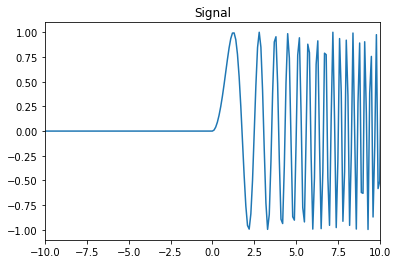

In [63]:
# b.)
# By modifying the lecture notes from lec15...
# Initialize variables
tau = 5
s = 5
def funcm(t):
    return funcdaughter(t,tau,s)
    
def funcdaughter(t,tau,s):
    if(0<t and t<15):
        return sin(t**2)
    else:
        return 0
 

step=0.1
t=arange(-100.,100.,step)

N=len(t)
y0=zeros(N)
y1=zeros(N)
y2=zeros(N)
y3=zeros(N)
dftz=zeros(N,complex )
nplot=zeros(N)
fplot=zeros(N)
for idx in range(len(t)):
    y0[idx]=funcm(t[idx])
    y1[idx]=funcdaughter(t[idx],2.,1.)
    y2[idx]=funcdaughter(t[idx],1.,2.)
    y3[idx]=funcdaughter(t[idx],2.,2.)
    
fig = plt.figure() 
plt.plot(t,y0)
plt.xlim([-10.,10.])
plt.title("Signal")
plt.show()